# Lab | Matplotlib & Seaborn (Challenge 3)

#### Import all the libraries that are necessary.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Challenge 3

#### Open the titanic file. Name your dataset titanic.

Download the dataset from [here](https://drive.google.com/file/d/1jkkOcWm9aEF8gb0r2SsarF5Qdoaaw1do/view?usp=sharing) and place it in the data folder

In [2]:
# Read the data
data = pd.read_csv('data/titanic.csv')
data.sample(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
590,591,0.0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.125,U0,S
208,209,1.0,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.750,U0,Q


#### Explore the titanic dataset using Pandas dtypes.

In [3]:
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
Hint: Use Pandas select_dtypes

In [4]:
# Numerical variables
data.select_dtypes(include=['float64', 'int64']).head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [5]:
# Categorical variables
data.select_dtypes(exclude=['float64', 'int64']).head(5)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
Hint: To set the style you can use matplotlib.pyplot functions or seaborn 

In [6]:
# Plot style change # Figure size change
plt.figure(figsize=(12,6))
sns.set(style='white')


<Figure size 864x432 with 0 Axes>

#### Use the right visulalization to show the distribution of the column Age.

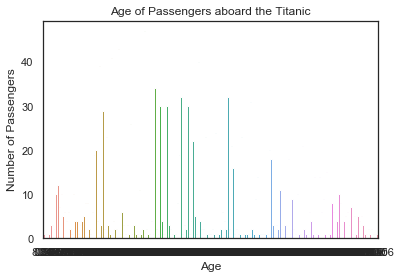

In [7]:
# Pandas plots are based on matplotlib

ages = data.pivot_table(index=["Age"], aggfunc = 'count').reset_index()


# Plot the histogram of column Age

ax = sns.barplot(x='Age', y='Gender', data = ages)

#sns.barplot(x= 'Gender', y='Age', data = data)

# Set titles, labels, etc
ax.set_title('Age of Passengers aboard the Titanic')
ax.set_ylabel('Number of Passengers')

# Show the plot
plt.show(ax)
#paolo: this is not the best plot to show this, try a histogramme

#### Use subplots and plot the distribution of the Age variable with bins equal to 10, 20 and 50.

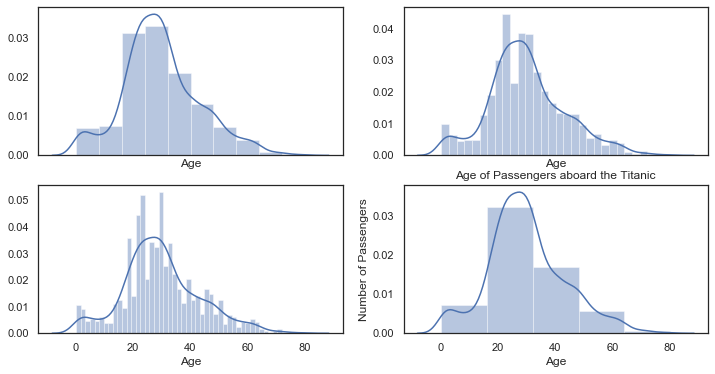

In [8]:
# Create a figure of a fixed size and axes
fig, ax = plt.subplots(2,2, figsize=(12,6), sharex=True)
plt.title('Age of Passengers aboard the Titanic')
plt.ylabel('Number of Passengers')
# Variables
sns.distplot(data['Age'], bins=10, ax = ax[0,0])
sns.distplot(data['Age'], ax = ax[0,1])
sns.distplot(data['Age'], bins=50, ax = ax[1,0])

# Plot the histogram using a different number of bins
sns.distplot(data['Age'], bins=5, ax = ax[1,1])

#paolo: nice one

#### How does the bin size affect your plot? Comment.

~~~~
Using a low number of bins (wider bins) reduces noise on the distribution estimation while using a 
high number of bins (narrower bins) gives greater precision to the distribution estimation (and more noise). 
~~~~

#### Use seaborn to show the distribution of the column Age.

In [9]:
# Seaborn is a Python library based on matplotlib

# Plot of the age histogram using seaborn

#

# Show the plot
#Nina: Already done as per above


#### Use the right plot to visualize the column Gender. There are 2 ways of doing it. Do it both ways.
Hint: Use matplotlib and seaborn

<Figure size 864x432 with 0 Axes>

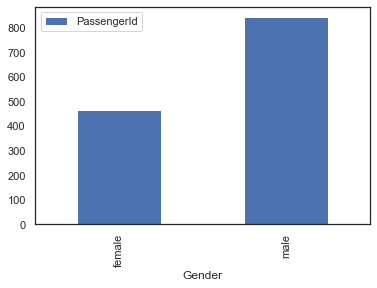

In [10]:
# OPTION 1 - Matplotlib
genders = data.groupby('Gender').agg('count')[['PassengerId']]


# Bar plot of the gender
plt.figure(figsize=(12,6))
genders.plot.bar()

# # Add labels to the plot and change xticks rotation


# # Show the plot
plt.show()

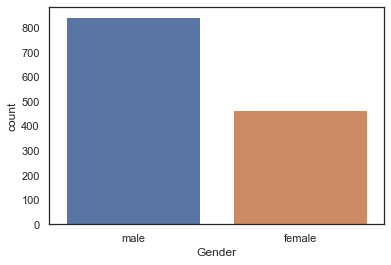

In [11]:
# OPTION 2 - Seaborn

# Seaborn Countplot
sns.countplot(data['Gender'])

# Show the plot
#paolo:ok

#### Use the right plot to visualize the column Pclass.

Text(0.5, 0, 'Passenger Class')

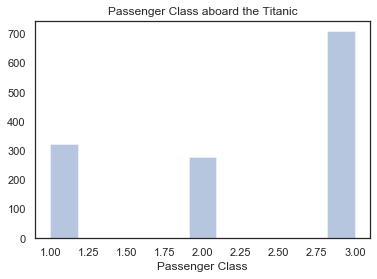

In [12]:
# Bar plot of Pclass
sns.distplot(data['Pclass'], kde=False)


# # Add labels to the plot and change xticks rotation
plt.title('Passenger Class aboard the Titanic')
plt.xlabel('Passenger Class')




# Show the plot
#paolo: yes, a background grid could help guide the eye

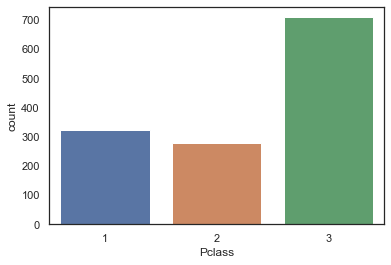

In [13]:
sns.countplot(data['Pclass'])

#Alternative method

#### We would like to have in one single plot the summary statistics of the feature Age. What kind of plot would you use?

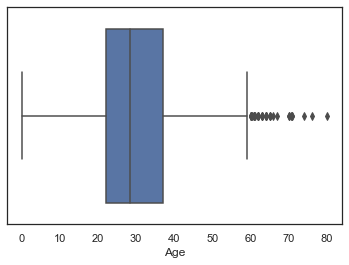

In [14]:
# Box plot
sns.boxplot(data['Age'])


# Show the plot
#paolo:yes

#### What does the last plot tells you about the feature Age? Comment.

~~~~
The statistics that you can get from the boxplot are the minimum, first quartile, median, 
third quartile, and maximum.

The red line shows us the median of Age. 
The blue box shows us the interquartile range (from Q1 to Q3).
It also shows us the outliers, which are out of the maximum and minimum range (Q1 - 1.5*IQR, Q3 + 1.5*IQR).
~~~~

#### Now in addition to the summary statistics, we want to have in the SAME plot the distribution of Age. What kind of plot would you use?

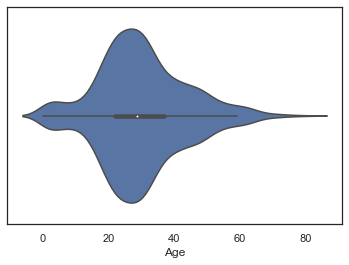

In [15]:
# Set figure size


# Violin plot
sns.violinplot(data['Age'])



# Show the plot
#paolo: yes, also here a grid coul help

#### What additional information the last plot provides you about the feature Age? Comment.

~~~~
This plot is a combination of a boxplot and a density plot. The violin plot features a kernel density estimation 
of the underlying distribution of the data.

The black central part of the plot is the same as a boxplot and the white dot is the median.
The blue part is the distribution of the data.
~~~~

#### We suspect that there is a linear relationship between Fare and Age. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
Hint: One of the ways involves using Seaborn.

Text(0.5, 1.0, 'Fare vs Age aboard the Titanic')

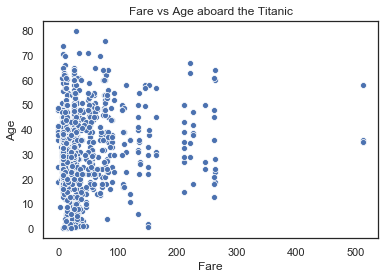

In [16]:
# OPTION 1

# Scatter plot
sns.scatterplot(y='Age', x='Fare', data = data)

# Add labels
plt.title('Fare vs Age aboard the Titanic')


# Show the plot


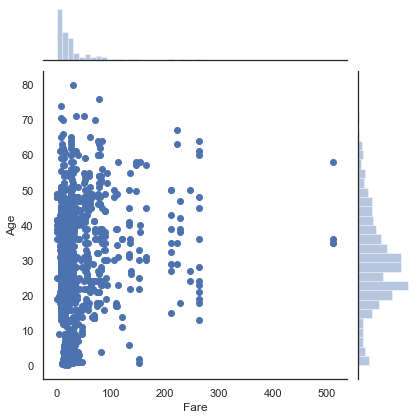

In [17]:
# OPTION 2

# Joinplot
sns.jointplot(y='Age', x='Fare', data = data)

# Show the plot


#### Using Seaborn plot the correlation matrix.

Text(0.5, 1, 'Correlation Matrix, Titanic Data')

<Figure size 720x720 with 0 Axes>

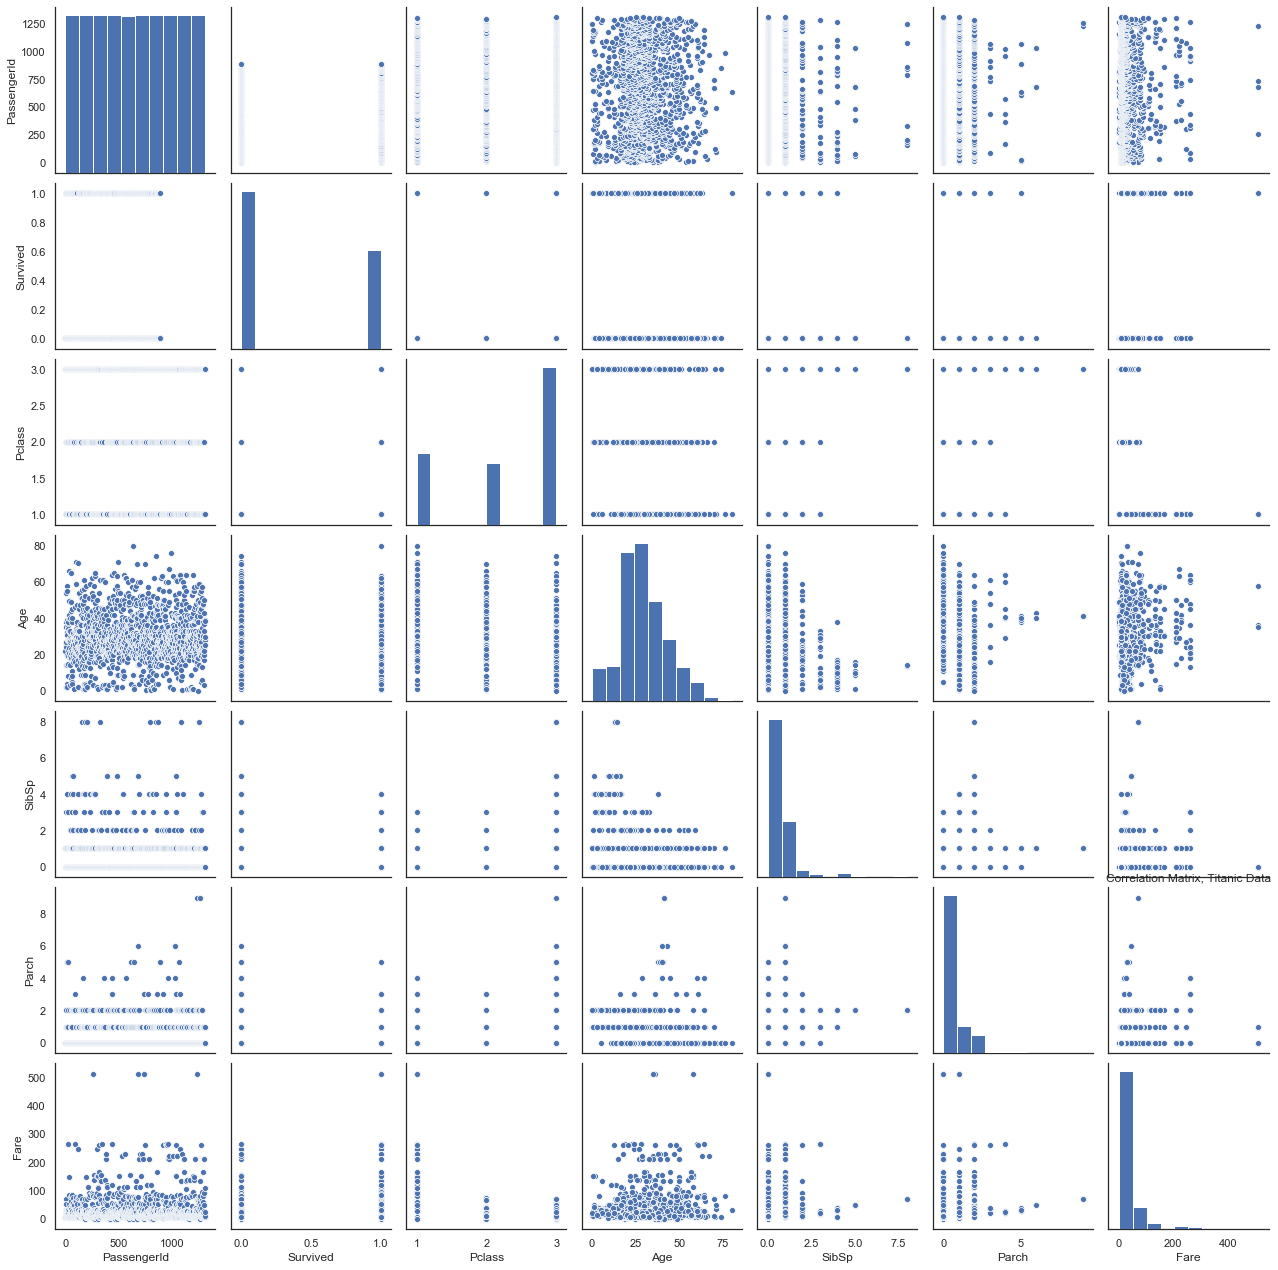

In [18]:
# Set figure size
plt.figure(figsize=(10,10))

# Correlation matrix
#paolo: this is not a correlation matrix
sns.pairplot(data)


# Add title
plt.title('Correlation Matrix, Titanic Data')



# Show plot


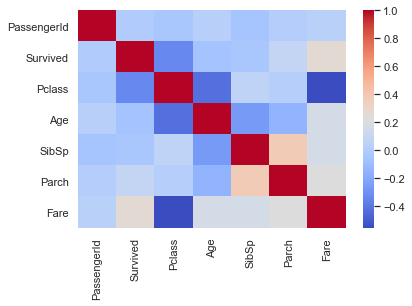

In [22]:
#paolo a correlation matrix is in this case a heatmap
sns.heatmap(data.corr(), cmap='coolwarm')
#here you can see the correlation amobg features from -1 to 1

#### What are the most correlated features? Comment.

~~~~~
The most correlated features are Parch and SibSp.
~~~~~

#### Use the right plot to display the summary statistics of the Age in function of the Pclass.

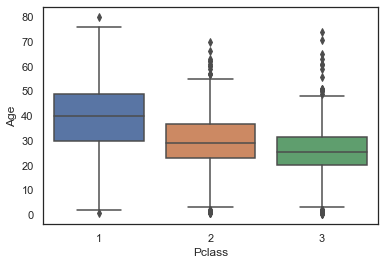

In [19]:
# Boxplot
data.Pclass.astype('int64')
sns.boxplot(x= data['Pclass'], y= data['Age'])



# Show the plot
#paolo: very well

#### Use the seaborn to plot the distribution of the Age based on the Gender.
Hint: Use Facetgrid

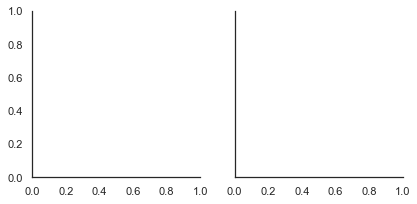

In [114]:
# Create a grid with FacetGrid
g = sns.FacetGrid(data, col='Gender')

# Draw a plot on each facet


# Show the plot
#paolo: you started well but you did not believe in it :)
#check below for possibility

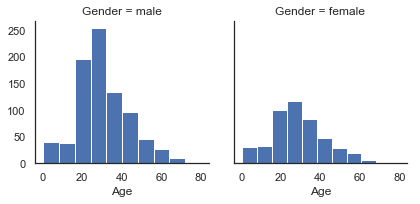

In [25]:
#paolo
#Create a grid with FacetGrid
g = sns.FacetGrid(data = data, col = 'Gender')

# Draw a plot on each facet
g.map(plt.hist, 'Age')

# Show the plot
plt.show()

In [27]:
#paolo: overall good